<a href="https://colab.research.google.com/github/ImanFatasya/Wafer-Defect-Detection-using-Deep-Learning-FYP-/blob/main/newfyp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Accessing Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Read the dataset from Google Drive
df = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/LSWMD.pkl')

Mounted at /content/drive


In [ ]:
total_wafers = df.shape[0]
total_wafers

811457

In [ ]:
df.head()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]]


In [ ]:
df.tail(10)

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
811447,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47542,18.0,[[Test]],[[Edge-Loc]]
811448,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1,...",600.0,lot47542,19.0,[[Test]],[[Edge-Ring]]
811449,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47542,20.0,[[Test]],[[none]]
811450,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2,...",600.0,lot47542,21.0,[[Test]],[[Edge-Loc]]
811451,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47542,22.0,[[Test]],[[Edge-Loc]]
811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,[[Test]],[[Edge-Ring]]
811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,[[Test]],[[Edge-Loc]]
811454,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,25.0,[[Test]],[[Edge-Ring]]
811455,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47543,1.0,[],[]
811456,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47543,2.0,[],[]


In [ ]:
# Correct columns

df.rename(columns={'trianTestLabel':'trainTestLabel'}, inplace=True)
df.waferIndex = df.waferIndex.astype(int)
df.tail()

,waferMap,dieSize,lotName,waferIndex,trainTestLabel,failureType
811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23,[[Test]],[[Edge-Ring]]
811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24,[[Test]],[[Edge-Loc]]
811454,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,25,[[Test]],[[Edge-Ring]]
811455,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47543,1,[],[]
811456,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47543,2,[],[]


**DATA ANALYSIS**

In [ ]:
# Add wafermapDim column for wafer map dimension because waferMap dim is different each other.

def find_dim(x):
    dim0=np.size(x,axis=0)
    dim1=np.size(x,axis=1)
    return dim0,dim1
df['waferMapDim']=df.waferMap.apply(find_dim)
df.sample(10)

,waferMap,dieSize,lotName,waferIndex,trainTestLabel,failureType,waferMapDim
486426,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,...",710.0,lot30111,9,[],[],"(32, 29)"
593274,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1513.0,lot37096,7,[],[],"(49, 39)"
711862,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,...",516.0,lot43501,20,[[Test]],[[none]],"(25, 27)"
57790,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1,...",904.0,lot4620,19,[],[],"(34, 34)"
380458,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2393.0,lot22694,4,[],[],"(52, 59)"
199109,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",3947.0,lot12723,23,[],[],"(66, 77)"
664635,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2,...",712.0,lot41393,7,[],[],"(32, 29)"
401874,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,...",811.0,lot24095,18,[],[],"(34, 31)"
141131,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,...",811.0,lot9144,9,[],[],"(34, 31)"
535972,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2,...",710.0,lot33491,8,[],[],"(32, 29)"


In [ ]:
print(df['waferMapDim'].unique())

[(45, 48) (53, 58) (26, 26) (70, 58) (107, 183) (34, 48) (60, 40) (37, 37)
 (37, 55) (41, 57) (39, 39) (62, 75) (50, 43) (43, 43) (36, 34) (42, 43)
 (75, 63) (32, 36) (27, 28) (57, 57) (76, 70) (34, 32) (44, 40) (49, 48)
 (102, 66) (53, 51) (63, 59) (54, 71) (75, 61) (54, 70) (29, 29) (53, 71)
 (25, 28) (88, 82) (71, 60) (38, 45) (112, 120) (59, 28) (39, 69) (67, 69)
 (66, 69) (66, 36) (59, 62) (57, 50) (89, 76) (42, 39) (37, 40) (55, 73)
 (46, 45) (61, 60) (41, 41) (32, 29) (86, 75) (118, 84) (79, 80) (54, 41)
 (54, 42) (173, 48) (33, 33) (64, 71) (42, 29) (131, 135) (90, 90)
 (61, 59) (31, 29) (42, 45) (45, 45) (49, 39) (35, 38) (41, 56) (43, 42)
 (43, 41) (26, 25) (32, 31) (49, 53) (89, 81) (155, 175) (57, 152)
 (41, 45) (79, 68) (68, 79) (87, 74) (101, 49) (51, 40) (42, 61) (30, 30)
 (42, 48) (33, 29) (41, 39) (33, 36) (39, 40) (18, 45) (86, 74) (12, 27)
 (34, 34) (27, 33) (212, 84) (25, 27) (52, 55) (56, 55) (40, 40) (28, 51)
 (57, 58) (37, 71) (18, 65) (29, 30) (46, 48) (28, 71) 

In [ ]:
Wdim = np.unique(df['waferMapDim'])

In [ ]:
#The image size are not always the same. There are 632 different size for wafer map
Wdim.size

632

In [ ]:
# To check failureType distribution and encoding label
df['failureNum'] = df['failureType']
mapping_type={'Center':0,'Donut':1,'Edge-Loc':2,'Edge-Ring':3,'Loc':4,'Random':5,'Scratch':6,'Near-full':7,'none':8}
df = df.replace({'failureNum':mapping_type})

1. df_withlabel : labeled wafer
2. df_withpattern : labeled & patterned wafer
3. df_nonpatter : labeled but non-patterned wafer

In [ ]:
df_withlabel = df[(df['failureNum']>=0) & (df['failureNum']<=8)]
df_withlabel =df_withlabel.reset_index() #labeled index.
df_withpattern = df[(df['failureNum']>=0) & (df['failureNum']<=7)]
df_withpattern = df_withpattern.reset_index() #patterned index.
df_nonpattern = df[(df['failureNum']==8)] #nonpatterned index
df_withlabel.shape[0], df_withpattern.shape[0], df_nonpattern.shape[0]

(172950, 25519, 147431)



| **Category**        | **Description**                              | **Number of Samples** |
|----------------------|----------------------------------------------|------------------------|
| **df_withlabel**     | Includes all labeled data (failureNum: 0 to 8) | 172,950               |
| **df_withpattern**   | Includes patterned data (failureNum: 0 to 7)   | 25,519                |
| **df_nonpattern**    | Includes non-patterned data (failureNum: 8)    | 147,431               |


Imbalance dataset

1. 172,950 wafers have labels while 78.7% wafers with no label based on failureType variable filtering.

2. Among labeled wafer, only 3.1% wafers (25,519 wafers) have real failure patterns while 147,431 wafers were still labeled none.

<ipython-input-12-e98777aa9d47>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels2)


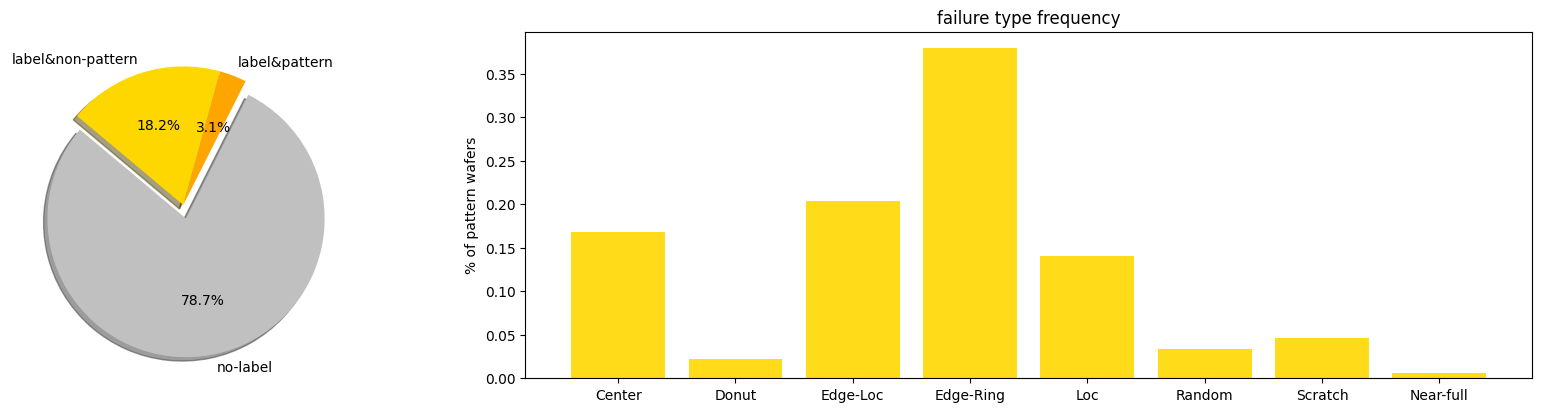

In [ ]:
from matplotlib import gridspec
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 4.5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2.5])
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

no_wafers=[total_wafers-df_withlabel.shape[0], df_withpattern.shape[0], df_nonpattern.shape[0]]

colors = ['silver', 'orange', 'gold']
explode = (0.1, 0, 0)  # explode 1st slice
labels = ['no-label','label&pattern','label&non-pattern']
ax1.pie(no_wafers, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

uni_pattern=np.unique(df_withpattern.failureNum, return_counts=True)
labels2 = ['','Center','Donut','Edge-Loc','Edge-Ring','Loc','Random','Scratch','Near-full']
ax2.bar(uni_pattern[0],uni_pattern[1]/df_withpattern.shape[0], color='gold', align='center', alpha=0.9)
ax2.set_title("failure type frequency")
ax2.set_ylabel("% of pattern wafers")
ax2.set_xticklabels(labels2)

plt.show()

In [ ]:
df_withlabel['waferMapDim'].value_counts()

,count
waferMapDim,
"(25, 27)",18781
"(26, 26)",14366
"(30, 34)",12400
"(29, 26)",11751
"(27, 25)",10682
...,...
"(68, 72)",1
"(29, 45)",1
"(38, 62)",1


In [ ]:
# imbalanced dataset for dimension!

Due to the variability in the original dimensions of the wafer maps, I couldn't directly resize all dimensions to 56x56 at once. Therefore, I choose the data with labels among two most popular group dim (25x27 & 26x26), resizing them to 56x56. After resizing each subset, I concatenated them to form the final dataset.

In [ ]:
# Extract (25,27) & (26,26) waferMapDim data

# Load package
import torch
import torchvision

def subwafer(sw,label):
    Dim0 = np.size(sw, axis=1)
    Dim1 = np.size(sw, axis=2)
    sub_df = df_withlabel.loc[df_withlabel['waferMapDim'] == (Dim0, Dim1)]
    sub_wafer = sub_df['waferMap'].values
    sw = sw.to(torch.device('cpu'))
    for i in range(len(sub_df)):
        waferMap = torch.from_numpy(sub_df.iloc[i,:]['waferMap'].reshape(1, Dim0, Dim1))
        waferMap = waferMap.to(torch.device('cpu'))
        sw = torch.cat([sw, waferMap])
        label.append(sub_df.iloc[i,:]['failureType'][0][0])
    x = sw[1:]
    y = np.array(label).reshape((-1,1))
    del waferMap, sw
    return x, y

sw0 = torch.ones((1, 25, 27))
sw1 = torch.ones((1, 26, 26))
label0 = list()
label1 = list()
x0, y0 = subwafer(sw0, label0)
x1, y1 = subwafer(sw1, label1)
x0.shape, x1.shape

(torch.Size([18781, 25, 27]), torch.Size([14366, 26, 26]))

In [ ]:
# converting wafer map images to RGB format
# 0: non wafer -> R, 1: normal die -> G, 2: defect die -> B

def rgb_sw(x):
    Dim0 = np.size(x, axis=1)
    Dim1 = np.size(x, axis=2)
    new_x = np.zeros((len(x), Dim0, Dim1, 3))
    x = torch.unsqueeze(x,-1)
    x = x.to(torch.device('cpu'))
    x = x.numpy()
    for w in range(len(x)):
        for i in range(Dim0):
            for j in range(Dim1):
                new_x[w, i, j, int(x[w, i, j])] = 1
    return new_x

rgb_x0 = rgb_sw(x0)
rgb_x1 = rgb_sw(x1)

<ipython-input-15-8957a3740f32>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  new_x[w, i, j, int(x[w, i, j])] = 1




| **Color** | **Region**             | **Label**                |
|-----------|------------------------|--------------------------|
| R (Red)   | Non wafer regions      | 0                        |
| G (Green) | Normal die             | 1                        |
| B (Blue)  | Defective die          | 2                        |

This table shows the color coding for each region type and the corresponding label used for classification in the image-based defect analysis.

In [ ]:
# Resize dim 25x27 & 26x26 to 56x56.
from PIL import Image
def resize(x):
    rwm = torch.ones((1,56,56,3))
    for i in range(len(x)):
        rwm = rwm.to(torch.device('cpu'))
        a = Image.fromarray(x[i].astype('uint8')).resize((56,56))
        a = np.array(a).reshape((1,56,56,3))
        a = torch.from_numpy(a)
        a = a.to(torch.device('cpu'))
        rwm = torch.cat([rwm, a])
    x = rwm[1:]
    del rwm
    return x

resized_x0 = resize(rgb_x0)
resized_x1 = resize(rgb_x1)

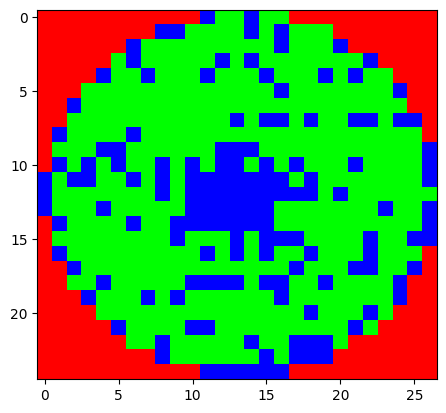

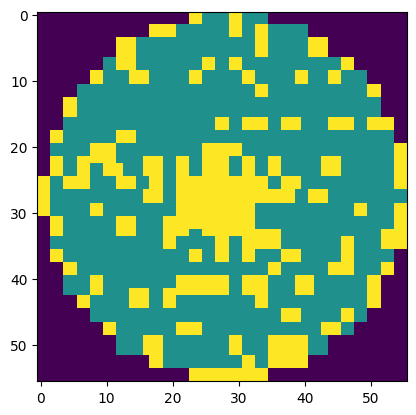

In [ ]:
#PLOTTING
plt.imshow(rgb_x0[1000])
plt.show()
plt.imshow(torch.argmax(resized_x0[1000],axis=2).cpu().numpy())
plt.show()

1. The first plot shows the original RGB wafer map with colors representing the different regions (Red for non-wafer, Green for normal die, Blue for defects).
2. The second plot shows the class map after applying argmax, where each pixel is replaced by its dominant class index (0, 1, or 2), showing a "flattened" image with areas representing wafer regions, normal dies, or defective dies in a single channel form.

In [ ]:
# Concatenate all data together

# resized_wm = feature data, which consists of the wafer map images.
resized_wm = torch.cat([resized_x0, resized_x1])

# label_wm = target label data, representing the class or defect type for each wafer map
label_wm = np.concatenate((y0, y1))

1. resized_wm is the feature data that goes into the model,
2. label_wm is the ground truth data that the model is trained to predict.

In [ ]:
resized_wm.shape

torch.Size([33147, 56, 56, 3])

In [ ]:
label_wm.shape

(33147, 1)

In [ ]:
# delete data
del y0,y1,resized_x0, resized_x1
del rgb_x0, rgb_x1
del x0, x1

In [ ]:
(unique, counts) = np.unique(label_wm, return_counts=True)

# Display the distribution of defect labels
distribution = dict(zip(unique, counts))
print("Defect Distribution:", distribution)

Defect Distribution: {'Center': 2341, 'Donut': 1, 'Edge-Loc': 651, 'Edge-Ring': 56, 'Loc': 469, 'Near-full': 37, 'Random': 127, 'Scratch': 95, 'none': 29370}


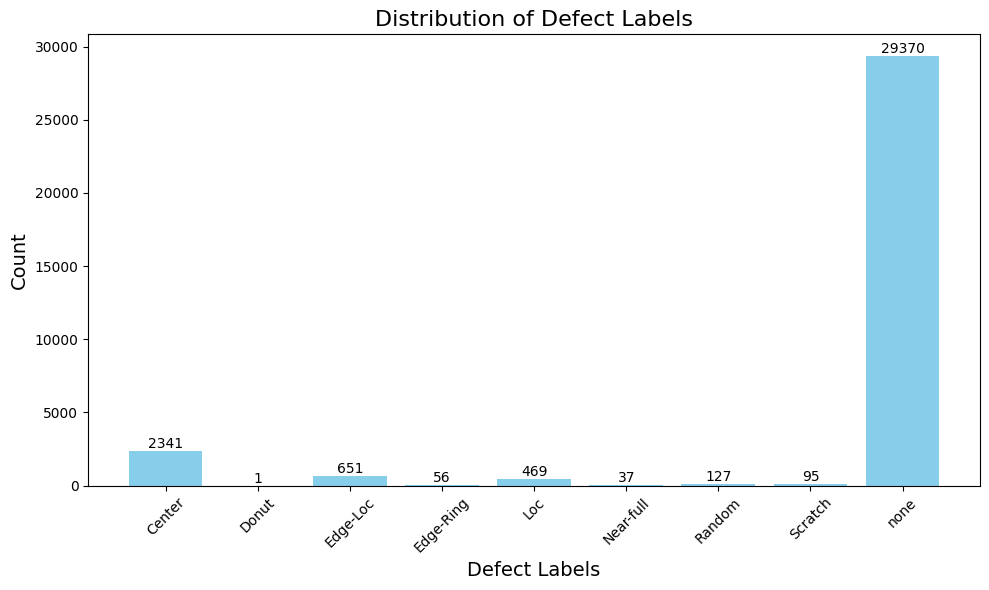

In [ ]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(unique, counts, color='skyblue')

# Add titles and labels
plt.title('Distribution of Defect Labels', fontsize=16)
plt.xlabel('Defect Labels', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add value labels above each bar
for i in range(len(counts)):
    plt.text(unique[i], counts[i], str(counts[i]), ha='center', va='bottom')

# Show the plot
plt.xticks(rotation=45)  # Rotate the x-axis labels if needed
plt.tight_layout()
plt.show()


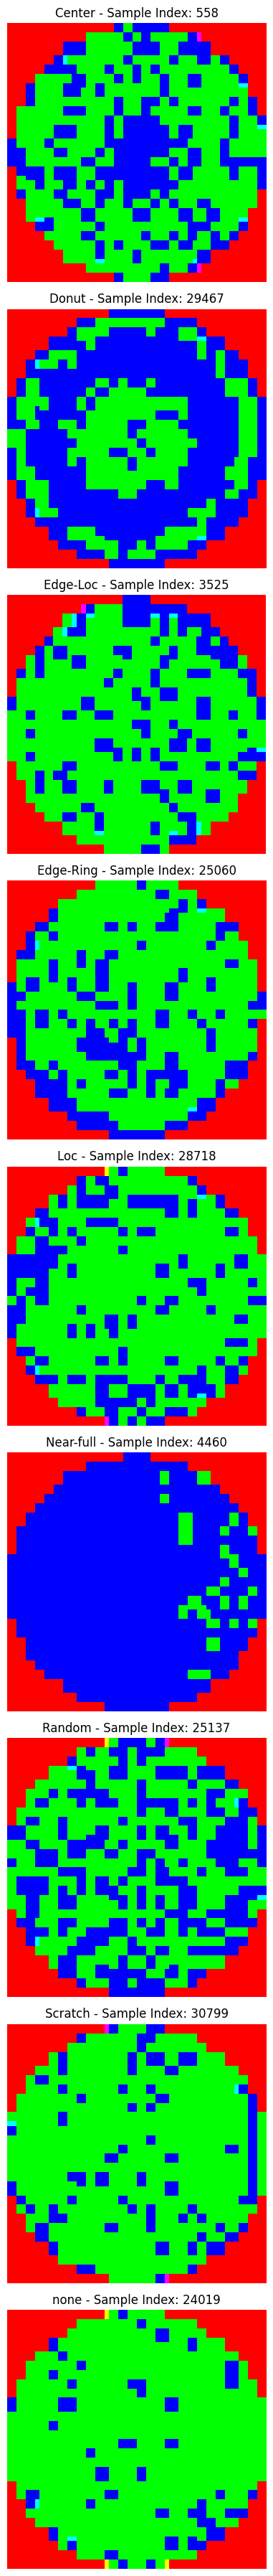

In [ ]:
import matplotlib.pyplot as plt
import random

# Set failure_types is a list of unique defect labels
failure_types = np.unique(label_wm)  # Get unique failure types
num_cat = len(failure_types)  # Number of failure types

# Plot 1 of each failure type
fig, axs = plt.subplots(num_cat, 1, figsize=(10, num_cat * 4))  # Adjust figure size

for i_cat, cat in enumerate(failure_types):
    # Get indices of the samples belonging to the current failure type
    cat_indices = np.where(label_wm == cat)[0]

    # Randomly select one sample
    random.seed(42)
    index = random.choice(cat_indices)

    # Plot the resized wafer map image
    axs[i_cat].axis('off')  # Turn off the axis for cleaner visualization
    axs[i_cat].imshow(resized_wm[index].cpu().numpy())  # Show the resized wafer map

    # Set title for the plot
    axs[i_cat].set_title(f'{cat} - Sample Index: {index}')

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()


In [ ]:
import torch
import numpy as np

# Save the feature data (resized wafer maps) and labels (label_wm)
torch.save(resized_wm, '/content/drive/MyDrive/Colab Notebooks/resized_wm.pt')  # Save the feature data as .pt file
np.save('/content/drive/MyDrive/Colab Notebooks/label_wm.npy', label_wm)        # Save the labels as .npy file